# Data Preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [3]:
#Read in the ticketmaster data from .csv
df = pd.read_csv('more_markets_tm_events_040121_123121.csv')
df.head(1)

,Unnamed: 0,TM_id,TM_name,TM_artist,TM_venue,TM_venue_city,TM_venue_state,TM_venue _lat,TM_venue_long,TM_date,...,max,min,type_x,primary,segment,genre,subGenre,type_y,subType,family
0,0,vvG1HZ4UM7MxxI,A Thousand Thoughts: A live documentary with t...,['Kronos Quartet'],Moore Theatre,Seattle,WA,47.653293,-122.359344,2021-09-18T02:30:00Z,...,70.0,40.0,standard,True,Arts & Theatre,Music,Chamber Music,"{'id': 'KZAyXgnZfZ7v7nI', 'name': 'Undefined'}","{'id': 'KZFzBErXgnZfZ7v7lJ', 'name': 'Undefined'}",False


In [4]:
#Shape of the dataframe
df.shape

(3573, 28)

In [5]:
#Check all columns have unique names
df.columns.unique().value_counts()

0                        1
genre                    1
TM_presale_date_start    1
type_x                   1
Unnamed: 0               1
TM_venue _lat            1
TM_promoter              1
subType                  1
family                   1
primary                  1
TM_sale_date_start       1
max                      1
TM_venue                 1
TM_date                  1
TM_timezone              1
min                      1
TM_presale_date_end      1
TM_artist                1
TM_venue_long            1
type_y                   1
currency                 1
TM_span_multiple_days    1
TM_venue_state           1
TM_venue_city            1
subGenre                 1
TM_name                  1
TM_id                    1
segment                  1
dtype: int64

In [6]:
#Look at the summary info for the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3573 entries, 0 to 3572
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3573 non-null   int64  
 1   TM_id                  3573 non-null   object 
 2   TM_name                3573 non-null   object 
 3   TM_artist              3573 non-null   object 
 4   TM_venue               3573 non-null   object 
 5   TM_venue_city          3573 non-null   object 
 6   TM_venue_state         3573 non-null   object 
 7   TM_venue _lat          3573 non-null   float64
 8   TM_venue_long          3573 non-null   float64
 9   TM_date                3573 non-null   object 
 10  TM_timezone            3573 non-null   object 
 11  TM_span_multiple_days  3573 non-null   bool   
 12  TM_presale_date_start  3573 non-null   object 
 13  TM_presale_date_end    3573 non-null   object 
 14  TM_sale_date_start     3573 non-null   object 
 15  TM_p

In [7]:
#Return count of null values for columns with nulls
df.isnull().sum(axis = 0)

Unnamed: 0                  0
TM_id                       0
TM_name                     0
TM_artist                   0
TM_venue                    0
TM_venue_city               0
TM_venue_state              0
TM_venue _lat               0
TM_venue_long               0
TM_date                     0
TM_timezone                 0
TM_span_multiple_days       0
TM_presale_date_start       0
TM_presale_date_end         0
TM_sale_date_start          0
TM_promoter                 0
0                        3573
currency                  267
max                       267
min                       267
type_x                    267
primary                     0
segment                     0
genre                       0
subGenre                    0
type_y                      0
subType                     0
family                      0
dtype: int64

### Initial Preparation tasks:
- Reset index to TM_id
- Rename columns (cut out TM where it makes sense to do so)
- Drop columns:
    0 - No data for any observations
    Unnamed: 0 - Generic index (reset to TM_id)

In [8]:
df.drop(columns={'0', 'Unnamed: 0'}, inplace=True)

In [9]:
df.head()

,TM_id,TM_name,TM_artist,TM_venue,TM_venue_city,TM_venue_state,TM_venue _lat,TM_venue_long,TM_date,TM_timezone,...,max,min,type_x,primary,segment,genre,subGenre,type_y,subType,family
0,vvG1HZ4UM7MxxI,A Thousand Thoughts: A live documentary with t...,['Kronos Quartet'],Moore Theatre,Seattle,WA,47.653293,-122.359344,2021-09-18T02:30:00Z,America/Los_Angeles,...,70.00,40.00,standard,True,Arts & Theatre,Music,Chamber Music,"{'id': 'KZAyXgnZfZ7v7nI', 'name': 'Undefined'}","{'id': 'KZFzBErXgnZfZ7v7lJ', 'name': 'Undefined'}",False
1,vvG1HZ4z2Nhfmw,Def Leppard/Mötley Crüe/Poison/Joan Jett and t...,"['Def Leppard', 'Mötley Crüe', 'Poison', 'Joan...",T-Mobile Park,Seattle,WA,47.590333,-122.332850,2021-09-07T23:30:00Z,America/Los_Angeles,...,750.00,69.50,standard,True,Music,Rock,Pop,"{'id': 'KZAyXgnZfZ7v7nI', 'name': 'Undefined'}","{'id': 'KZFzBErXgnZfZ7v7lJ', 'name': 'Undefined'}",False
2,vvG1HZ4wKgz0ln,The Hella Mega Tour-Green Day/Fall Out Boy/Weezer,"['Green Day', 'Fall Out Boy', 'Weezer', 'The I...",T-Mobile Park,Seattle,WA,47.590333,-122.332850,2021-07-15T00:30:00Z,America/Los_Angeles,...,189.50,39.50,standard,True,Music,Rock,Alternative Rock,"{'id': 'KZAyXgnZfZ7v7nI', 'name': 'Undefined'}","{'id': 'KZFzBErXgnZfZ7v7lJ', 'name': 'Undefined'}",False
3,vvG1HZpd6SnMVq,Chris Stapleton's All-American Road Show,['Chris Stapleton'],Gorge Amphitheatre,George,WA,47.095947,-119.982652,2021-06-13T02:00:00Z,America/Los_Angeles,...,99.75,39.75,standard,True,Music,Country,Country,"{'id': 'KZAyXgnZfZ7v7nI', 'name': 'Undefined'}","{'id': 'KZFzBErXgnZfZ7v7lJ', 'name': 'Undefined'}",False
4,vvG1HZ4UiS1gC7,Harry Styles: Love On Tour,"['Harry Styles', 'Jenny Lewis']",Tacoma Dome,Tacoma,WA,47.236340,-122.426834,2021-08-15T03:00:00Z,America/Los_Angeles,...,169.50,39.50,standard,True,Music,Pop,Pop,"{'id': 'KZAyXgnZfZ7v7nI', 'name': 'Undefined'}","{'id': 'KZFzBErXgnZfZ7v7lJ', 'name': 'Undefined'}",False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3573 entries, 0 to 3572
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TM_id                  3573 non-null   object 
 1   TM_name                3573 non-null   object 
 2   TM_artist              3573 non-null   object 
 3   TM_venue               3573 non-null   object 
 4   TM_venue_city          3573 non-null   object 
 5   TM_venue_state         3573 non-null   object 
 6   TM_venue _lat          3573 non-null   float64
 7   TM_venue_long          3573 non-null   float64
 8   TM_date                3573 non-null   object 
 9   TM_timezone            3573 non-null   object 
 10  TM_span_multiple_days  3573 non-null   bool   
 11  TM_presale_date_start  3573 non-null   object 
 12  TM_presale_date_end    3573 non-null   object 
 13  TM_sale_date_start     3573 non-null   object 
 14  TM_promoter            3573 non-null   object 
 15  curr

In [11]:
df.TM_date = df.TM_date.str.replace('T',' ')

In [12]:
df.TM_date = df.TM_date.str.replace('Z','')

In [13]:
df.drop(df[df['TM_date'] == '{}'].index, inplace = True)

In [14]:
#convert timestame to datetime dtype
df.TM_date= pd.to_datetime(df.TM_date, format='%Y-%m-%d %H:%M:%S') 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3505 entries, 0 to 3572
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   TM_id                  3505 non-null   object        
 1   TM_name                3505 non-null   object        
 2   TM_artist              3505 non-null   object        
 3   TM_venue               3505 non-null   object        
 4   TM_venue_city          3505 non-null   object        
 5   TM_venue_state         3505 non-null   object        
 6   TM_venue _lat          3505 non-null   float64       
 7   TM_venue_long          3505 non-null   float64       
 8   TM_date                3505 non-null   datetime64[ns]
 9   TM_timezone            3505 non-null   object        
 10  TM_span_multiple_days  3505 non-null   bool          
 11  TM_presale_date_start  3505 non-null   object        
 12  TM_presale_date_end    3505 non-null   object        
 13  TM_

In [16]:
df.head()

,TM_id,TM_name,TM_artist,TM_venue,TM_venue_city,TM_venue_state,TM_venue _lat,TM_venue_long,TM_date,TM_timezone,...,max,min,type_x,primary,segment,genre,subGenre,type_y,subType,family
0,vvG1HZ4UM7MxxI,A Thousand Thoughts: A live documentary with t...,['Kronos Quartet'],Moore Theatre,Seattle,WA,47.653293,-122.359344,2021-09-18 02:30:00,America/Los_Angeles,...,70.00,40.00,standard,True,Arts & Theatre,Music,Chamber Music,"{'id': 'KZAyXgnZfZ7v7nI', 'name': 'Undefined'}","{'id': 'KZFzBErXgnZfZ7v7lJ', 'name': 'Undefined'}",False
1,vvG1HZ4z2Nhfmw,Def Leppard/Mötley Crüe/Poison/Joan Jett and t...,"['Def Leppard', 'Mötley Crüe', 'Poison', 'Joan...",T-Mobile Park,Seattle,WA,47.590333,-122.332850,2021-09-07 23:30:00,America/Los_Angeles,...,750.00,69.50,standard,True,Music,Rock,Pop,"{'id': 'KZAyXgnZfZ7v7nI', 'name': 'Undefined'}","{'id': 'KZFzBErXgnZfZ7v7lJ', 'name': 'Undefined'}",False
2,vvG1HZ4wKgz0ln,The Hella Mega Tour-Green Day/Fall Out Boy/Weezer,"['Green Day', 'Fall Out Boy', 'Weezer', 'The I...",T-Mobile Park,Seattle,WA,47.590333,-122.332850,2021-07-15 00:30:00,America/Los_Angeles,...,189.50,39.50,standard,True,Music,Rock,Alternative Rock,"{'id': 'KZAyXgnZfZ7v7nI', 'name': 'Undefined'}","{'id': 'KZFzBErXgnZfZ7v7lJ', 'name': 'Undefined'}",False
3,vvG1HZpd6SnMVq,Chris Stapleton's All-American Road Show,['Chris Stapleton'],Gorge Amphitheatre,George,WA,47.095947,-119.982652,2021-06-13 02:00:00,America/Los_Angeles,...,99.75,39.75,standard,True,Music,Country,Country,"{'id': 'KZAyXgnZfZ7v7nI', 'name': 'Undefined'}","{'id': 'KZFzBErXgnZfZ7v7lJ', 'name': 'Undefined'}",False
4,vvG1HZ4UiS1gC7,Harry Styles: Love On Tour,"['Harry Styles', 'Jenny Lewis']",Tacoma Dome,Tacoma,WA,47.236340,-122.426834,2021-08-15 03:00:00,America/Los_Angeles,...,169.50,39.50,standard,True,Music,Pop,Pop,"{'id': 'KZAyXgnZfZ7v7nI', 'name': 'Undefined'}","{'id': 'KZFzBErXgnZfZ7v7lJ', 'name': 'Undefined'}",False


In [17]:
df.TM_date

0      2021-09-18 02:30:00
1      2021-09-07 23:30:00
2      2021-07-15 00:30:00
3      2021-06-13 02:00:00
4      2021-08-15 03:00:00
               ...        
3568   2022-01-02 19:00:00
3569   2022-03-31 23:30:00
3570   2022-02-19 01:00:00
3571   2022-03-13 23:00:00
3572   2022-04-24 23:00:00
Name: TM_date, Length: 3505, dtype: datetime64[ns]

In [18]:
df.TM_date.sample(20)

1390   2021-08-22 00:30:00
1990   2021-12-09 00:30:00
551    2021-11-14 04:00:00
3048   2021-05-01 20:30:00
3229   2022-06-03 00:30:00
589    2021-05-09 03:00:00
1420   2021-08-21 01:30:00
1914   2021-07-27 23:30:00
436    2021-09-05 03:00:00
85     2021-05-16 02:30:00
3338   2022-11-03 23:00:00
2801   2021-09-29 00:00:00
2023   2021-05-16 00:00:00
3535   2022-04-23 23:30:00
695    2021-04-14 04:30:00
892    2021-07-21 04:30:00
2052   2021-10-03 00:00:00
2175   2021-09-09 00:00:00
2946   2021-05-01 01:00:00
2358   2021-07-29 23:00:00
Name: TM_date, dtype: datetime64[ns]

In [19]:
df.shape

(3505, 26)

In [20]:
#Check if there are any duplicate dates and times
df.TM_date.nunique()

2117

In [21]:
#Check if all TM_ids are unique
df.TM_id.nunique()

3505

In [22]:
df.columns

Index(['TM_id', 'TM_name', 'TM_artist', 'TM_venue', 'TM_venue_city',
       'TM_venue_state', 'TM_venue _lat', 'TM_venue_long', 'TM_date',
       'TM_timezone', 'TM_span_multiple_days', 'TM_presale_date_start',
       'TM_presale_date_end', 'TM_sale_date_start', 'TM_promoter', 'currency',
       'max', 'min', 'type_x', 'primary', 'segment', 'genre', 'subGenre',
       'type_y', 'subType', 'family'],
      dtype='object')

In [23]:
#drop columns for type_y and subtype
df.drop(columns={'type_y', 'subType'}, inplace=True)

In [24]:
df.drop(columns={'TM_presale_date_start',
       'TM_presale_date_end', 'TM_sale_date_start','TM_timezone'}, inplace=True)

In [25]:
df.head()

,TM_id,TM_name,TM_artist,TM_venue,TM_venue_city,TM_venue_state,TM_venue _lat,TM_venue_long,TM_date,TM_span_multiple_days,TM_promoter,currency,max,min,type_x,primary,segment,genre,subGenre,family
0,vvG1HZ4UM7MxxI,A Thousand Thoughts: A live documentary with t...,['Kronos Quartet'],Moore Theatre,Seattle,WA,47.653293,-122.359344,2021-09-18 02:30:00,False,PROMOTED BY VENUE,USD,70.00,40.00,standard,True,Arts & Theatre,Music,Chamber Music,False
1,vvG1HZ4z2Nhfmw,Def Leppard/Mötley Crüe/Poison/Joan Jett and t...,"['Def Leppard', 'Mötley Crüe', 'Poison', 'Joan...",T-Mobile Park,Seattle,WA,47.590333,-122.332850,2021-09-07 23:30:00,False,LIVE NATION MUSIC,USD,750.00,69.50,standard,True,Music,Rock,Pop,False
2,vvG1HZ4wKgz0ln,The Hella Mega Tour-Green Day/Fall Out Boy/Weezer,"['Green Day', 'Fall Out Boy', 'Weezer', 'The I...",T-Mobile Park,Seattle,WA,47.590333,-122.332850,2021-07-15 00:30:00,False,LIVE NATION MUSIC,USD,189.50,39.50,standard,True,Music,Rock,Alternative Rock,False
3,vvG1HZpd6SnMVq,Chris Stapleton's All-American Road Show,['Chris Stapleton'],Gorge Amphitheatre,George,WA,47.095947,-119.982652,2021-06-13 02:00:00,False,LIVE NATION MUSIC,USD,99.75,39.75,standard,True,Music,Country,Country,False
4,vvG1HZ4UiS1gC7,Harry Styles: Love On Tour,"['Harry Styles', 'Jenny Lewis']",Tacoma Dome,Tacoma,WA,47.236340,-122.426834,2021-08-15 03:00:00,False,LIVE NATION - NO LN CONCERTS BRANDING,USD,169.50,39.50,standard,True,Music,Pop,Pop,False


In [26]:
def clean_tm_time(col):
    df[col] = df[col].str.replace('T',' ')
    
    df[col] = df[col].str.replace('Z','')
    
    df.drop(df[df[col] == '{}'].index, inplace = True)
    
    #convert timestame to datetime dtype
    df[col]= pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S') 
    
    return df[col] == df[col]
    
    

In [27]:
df['TM_artist'] = df['TM_artist'].str.replace('[','')

In [28]:
df['TM_artist'] = df['TM_artist'].str.replace(']','')

In [29]:
df['TM_artist'] = df['TM_artist'].str.replace("'",'')

In [30]:
df.head()

,TM_id,TM_name,TM_artist,TM_venue,TM_venue_city,TM_venue_state,TM_venue _lat,TM_venue_long,TM_date,TM_span_multiple_days,TM_promoter,currency,max,min,type_x,primary,segment,genre,subGenre,family
0,vvG1HZ4UM7MxxI,A Thousand Thoughts: A live documentary with t...,Kronos Quartet,Moore Theatre,Seattle,WA,47.653293,-122.359344,2021-09-18 02:30:00,False,PROMOTED BY VENUE,USD,70.00,40.00,standard,True,Arts & Theatre,Music,Chamber Music,False
1,vvG1HZ4z2Nhfmw,Def Leppard/Mötley Crüe/Poison/Joan Jett and t...,"Def Leppard, Mötley Crüe, Poison, Joan Jett & ...",T-Mobile Park,Seattle,WA,47.590333,-122.332850,2021-09-07 23:30:00,False,LIVE NATION MUSIC,USD,750.00,69.50,standard,True,Music,Rock,Pop,False
2,vvG1HZ4wKgz0ln,The Hella Mega Tour-Green Day/Fall Out Boy/Weezer,"Green Day, Fall Out Boy, Weezer, The Interrupt...",T-Mobile Park,Seattle,WA,47.590333,-122.332850,2021-07-15 00:30:00,False,LIVE NATION MUSIC,USD,189.50,39.50,standard,True,Music,Rock,Alternative Rock,False
3,vvG1HZpd6SnMVq,Chris Stapleton's All-American Road Show,Chris Stapleton,Gorge Amphitheatre,George,WA,47.095947,-119.982652,2021-06-13 02:00:00,False,LIVE NATION MUSIC,USD,99.75,39.75,standard,True,Music,Country,Country,False
4,vvG1HZ4UiS1gC7,Harry Styles: Love On Tour,"Harry Styles, Jenny Lewis",Tacoma Dome,Tacoma,WA,47.236340,-122.426834,2021-08-15 03:00:00,False,LIVE NATION - NO LN CONCERTS BRANDING,USD,169.50,39.50,standard,True,Music,Pop,Pop,False


In [31]:
df.shape

(3505, 20)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3505 entries, 0 to 3572
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   TM_id                  3505 non-null   object        
 1   TM_name                3505 non-null   object        
 2   TM_artist              3505 non-null   object        
 3   TM_venue               3505 non-null   object        
 4   TM_venue_city          3505 non-null   object        
 5   TM_venue_state         3505 non-null   object        
 6   TM_venue _lat          3505 non-null   float64       
 7   TM_venue_long          3505 non-null   float64       
 8   TM_date                3505 non-null   datetime64[ns]
 9   TM_span_multiple_days  3505 non-null   bool          
 10  TM_promoter            3505 non-null   object        
 11  currency               3291 non-null   object        
 12  max                    3291 non-null   float64       
 13  min

In [33]:
df.dropna(inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3291 entries, 0 to 3572
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   TM_id                  3291 non-null   object        
 1   TM_name                3291 non-null   object        
 2   TM_artist              3291 non-null   object        
 3   TM_venue               3291 non-null   object        
 4   TM_venue_city          3291 non-null   object        
 5   TM_venue_state         3291 non-null   object        
 6   TM_venue _lat          3291 non-null   float64       
 7   TM_venue_long          3291 non-null   float64       
 8   TM_date                3291 non-null   datetime64[ns]
 9   TM_span_multiple_days  3291 non-null   bool          
 10  TM_promoter            3291 non-null   object        
 11  currency               3291 non-null   object        
 12  max                    3291 non-null   float64       
 13  min

<AxesSubplot:>

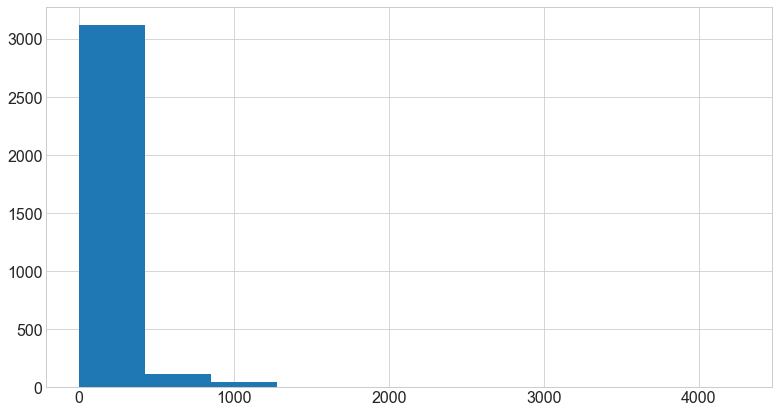

In [35]:
df['max'].hist()

<AxesSubplot:>

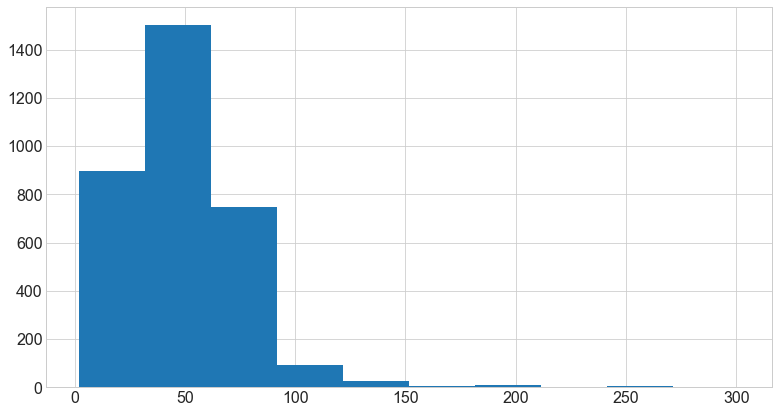

In [36]:
df['min'].hist()

In [37]:
df.currency.nunique()

1

In [38]:
df.drop(columns={'currency'}, inplace=True)

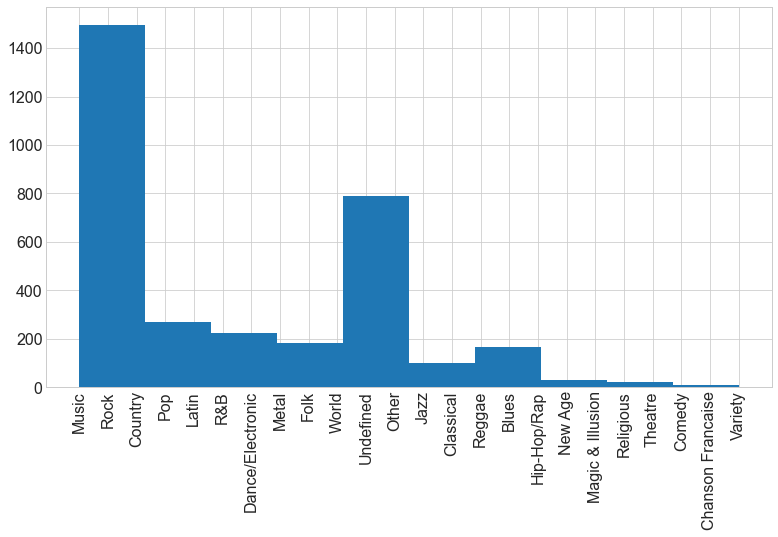

In [39]:
df.genre.hist()
plt.xticks(rotation='vertical')
plt.show()

In [40]:
#set timestamp as index
df = df.set_index('TM_date')

<AxesSubplot:xlabel='TM_date'>

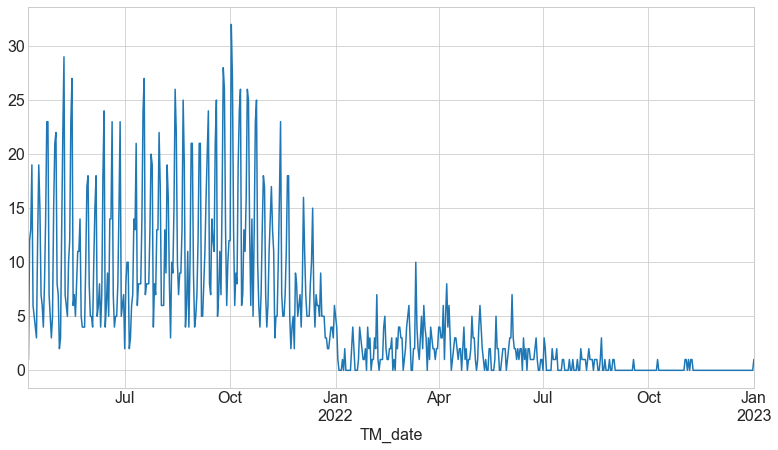

In [41]:
#Visualize the amount of shows by day
df.resample('D').TM_id.count().plot()

In [42]:
#Create a column for month
df['month'] = df.index.month_name()

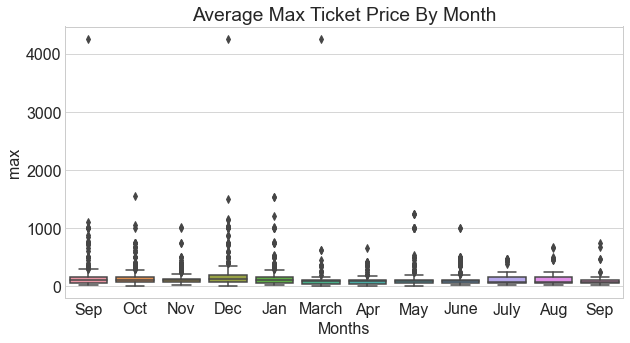

In [43]:
#Boxplot
plt.figure(figsize=(10, 5))
g = sns.boxplot(data = df, x = 'month', y = 'max')
plt.title('Average Max Ticket Price By Month')
g.set(xticklabels=['Sep','Oct','Nov','Dec','Jan','March','Apr','May','June','July','Aug','Sep'])
plt.xlabel('Months')
plt.show()

In [44]:
#What show has the max ticket price?
df[(df['max'] == df['max'].max())]

,TM_id,TM_name,TM_artist,TM_venue,TM_venue_city,TM_venue_state,TM_venue _lat,TM_venue_long,TM_span_multiple_days,TM_promoter,max,min,type_x,primary,segment,genre,subGenre,family,month
TM_date,,,,,,,,,,,,,,,,,,,
2021-08-15 20:30:00,vvG1zZ4z2fD4hl,Def Leppard/Mötley Crüe/Poison/Joan Jett and t...,"Def Leppard, Mötley Crüe, Poison, Joan Jett & ...",Truist Park,Atlanta,GA,33.890304,-84.468127,False,MLB REGULAR SEASON,4255.5,65.0,standard,True,Music,Rock,Pop,False,August
2021-12-02 21:30:00,vvG1zZpI9poe7D,Onsale Readiness: Face Value Exchange,Test Attraction,Road Atlanta,Braselton,GA,34.162504,-83.827095,False,PROMOTED BY VENUE,4255.5,5.5,standard,True,Music,Rock,Alternative Rock,False,December


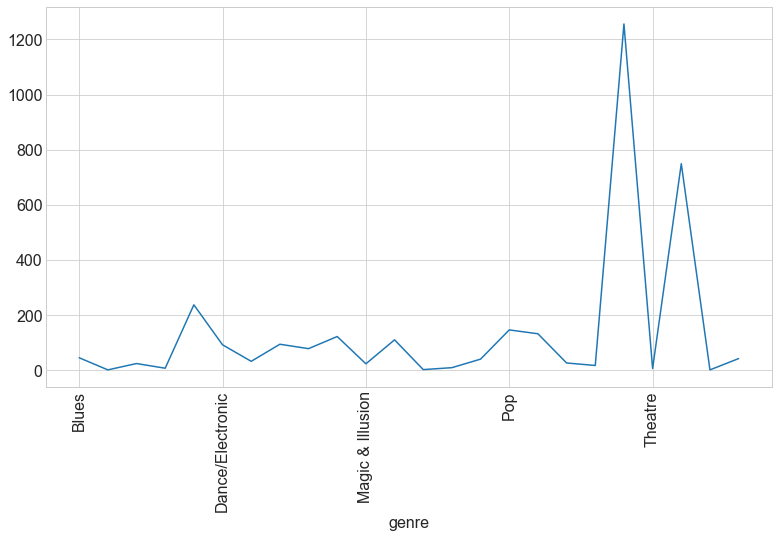

In [45]:
df.groupby('genre').TM_id.count().plot()
plt.xticks(rotation='vertical')
plt.show()